**IMPORT THE NECESSARY LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

*Suppress the warnings*

In [5]:
warnings.filterwarnings("ignore")

In [6]:
# Load the dataset
df = sns.load_dataset("mpg")

In [7]:
# Display the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


**PERFORM EDA**

In [9]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# Note the horsepower column. It has missing values

In [11]:
# Remove columns that won't help in determining the mpg variable
columns_to_drop = ["name"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [12]:
# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df.head())


Updated DataFrame:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    usa  
1          70    usa  
2          70    usa  
3          70    usa  
4          70    usa  


In [13]:
# Descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


**Skewness** *of variables*

*1. MPG Varaible*

In [16]:
# Calculate median
median_mpg = df['mpg'].median()
print("\nMedian MPG:", median_mpg)


Median MPG: 23.0


In [17]:
# Calculate mean
mean_mpg = df['mpg'].mean()
print("Mean MPG:", mean_mpg)

Mean MPG: 23.514572864321607


In [18]:
# The mean is slightly higher than the median, suggesting right-skewed data

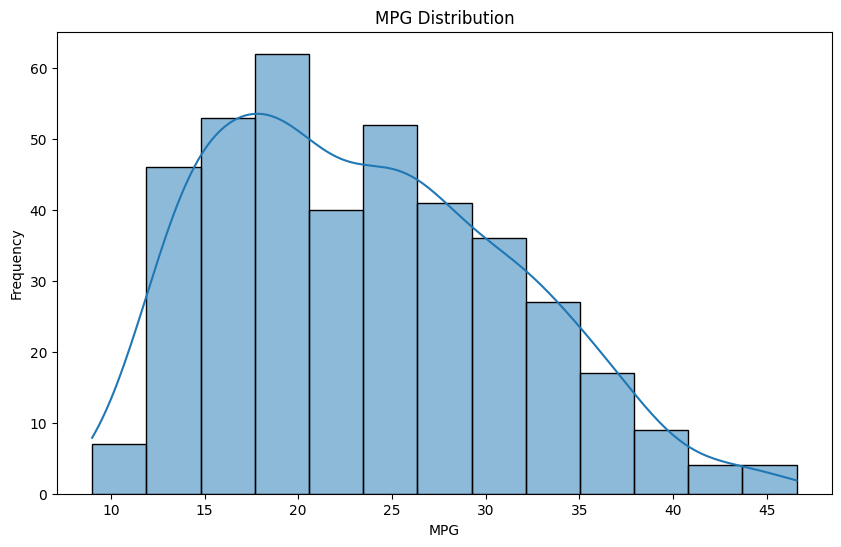

In [19]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True)
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate standard deviation
std_mpg = df['mpg'].std()
print("Standard Deviation of MPG:", std_mpg)

Standard Deviation of MPG: 7.815984312565782


In [21]:
# Calculate the mode
mode_mpg = df['mpg'].mode().iloc[0]
print("Mode MPG:", mode_mpg)

Mode MPG: 13.0


*Calculate Karl Pearson's coefficient of skewness*

In [23]:
pearson_skewness = (mean_mpg - mode_mpg) / std_mpg
print("Pearson's Skewness:", pearson_skewness)

Pearson's Skewness: 1.3452653490382902


In [24]:
# This indicates that the data in the mpg variable is highly skewed to the right

*2. Horsepower*

In [26]:
# Calculate median
median_horsepower = df['horsepower'].median()
print("\nMedian horsepower:", median_horsepower)


Median horsepower: 93.5


In [27]:
# Calculate mean
mean_horsepower = df['horsepower'].mean()
print("Mean horsepower:", mean_horsepower)

Mean horsepower: 104.46938775510205


In [28]:
# The mean is higher than the median, suggesting right-skewed data

**Data Preprocessing**

In [30]:
# Check for the number of cells with missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [31]:
# Filter the dataframe to show rows that contain null values
print("\nRows with Missing Values:")
print(df[df.isnull().any(axis=1)])


Rows with Missing Values:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin  
32           71     usa  
126          74     usa  
330          80  europe  
336          80     usa  
354          81  europe  
374          82     usa  


In [32]:
# Drop the rows that contain null values
df.dropna(inplace=True)

In [33]:
# Confirm that we have actually dropped the empty cells
print("\nMissing Values After Dropping Nulls:")
print(df.isnull().sum())


Missing Values After Dropping Nulls:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [34]:
# Alternatively, you could also do:
missing_values_present = df.isnull().sum().any()
print("\nMissing Values Present:", missing_values_present)


Missing Values Present: False


**Univarate Analysis**

*Analysis of the cylinder variable*

In [37]:
print("Unique values in 'cylinders':", df.cylinders.unique())
print("Value counts of 'cylinders':\n", df.cylinders.value_counts())

Unique values in 'cylinders': [8 4 6 3 5]
Value counts of 'cylinders':
 cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


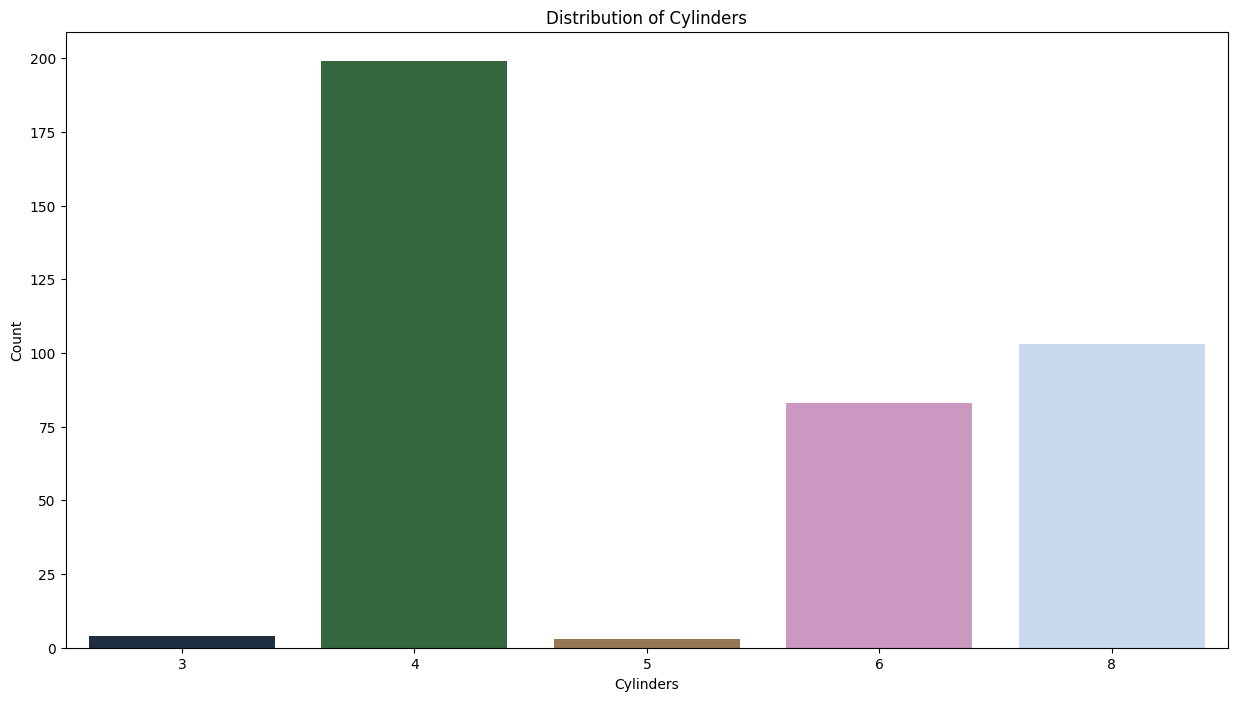

In [38]:
# Visualize 'cylinders' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="cylinders", data=df, palette="cubehelix")
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

In [39]:
# Vehicles with 4 cylinders have the highest observation value

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


*Analysis of the 'model_year' variable*

In [42]:
# Adjust the 'model_year' for better clarity
df["model_year"] = 1900 + df.model_year
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


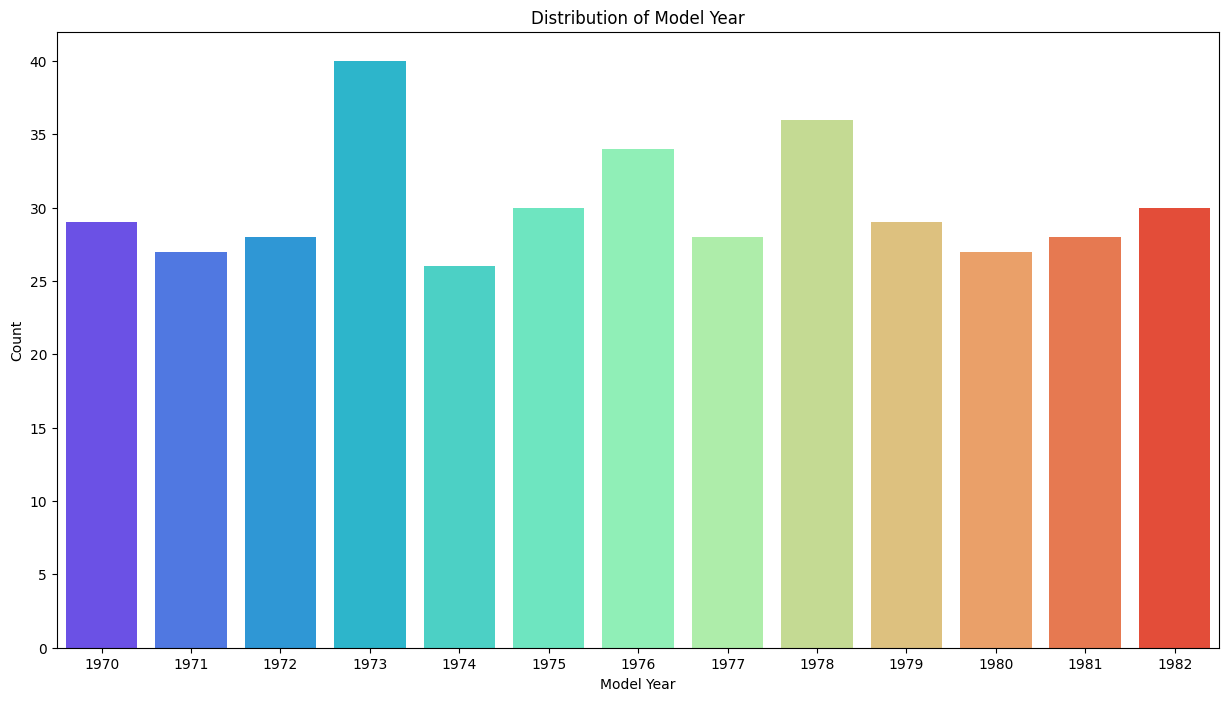

In [43]:
# Visualize 'model_year' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="model_year", data=df, palette="rainbow")
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

In [44]:
# The majority of the vehicles in the dataset are from the year 1973

*Analysis of the 'origin' variable*

In [46]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


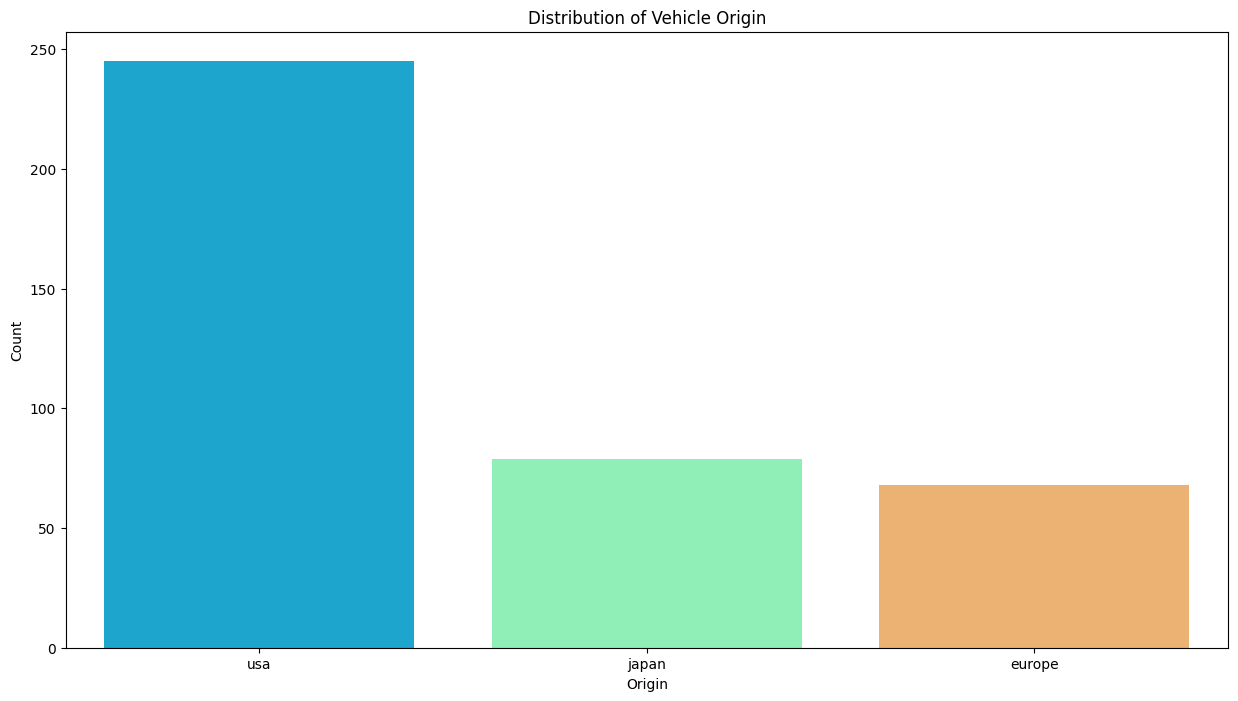

In [47]:
# Visualize 'origin' distribution
plt.figure(figsize=(15, 8))
sns.countplot(x="origin", data=df, palette="rainbow")
plt.title('Distribution of Vehicle Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()


In [48]:
# USA is the most common origin for the vehicles in the dataset

In [49]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


*Horsepower*

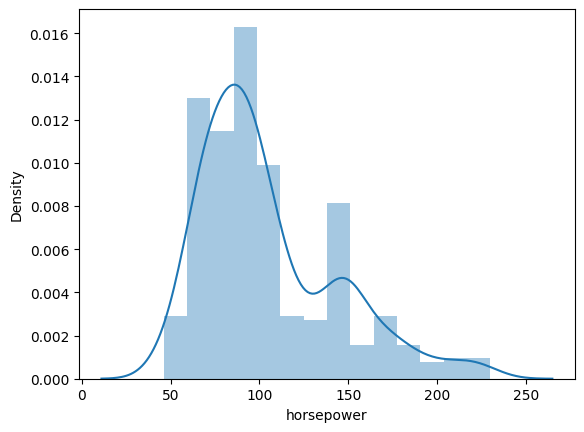

In [51]:
sns.distplot(df["horsepower"])
plt.show()

*Displacement*

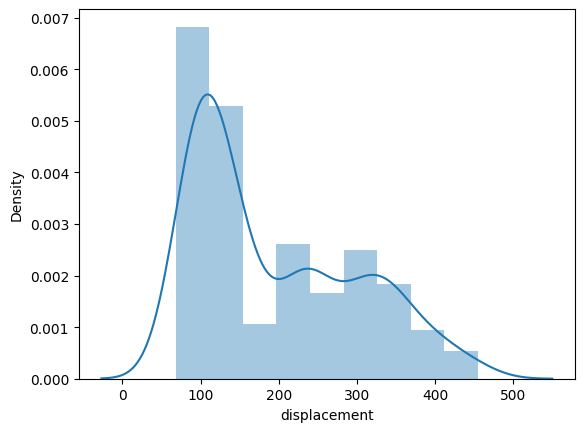

In [53]:
sns.distplot(df["displacement"])
plt.show()

**BIVARIATE ANALYSIS**

*Does the number of cylinders affect the mpg value?*

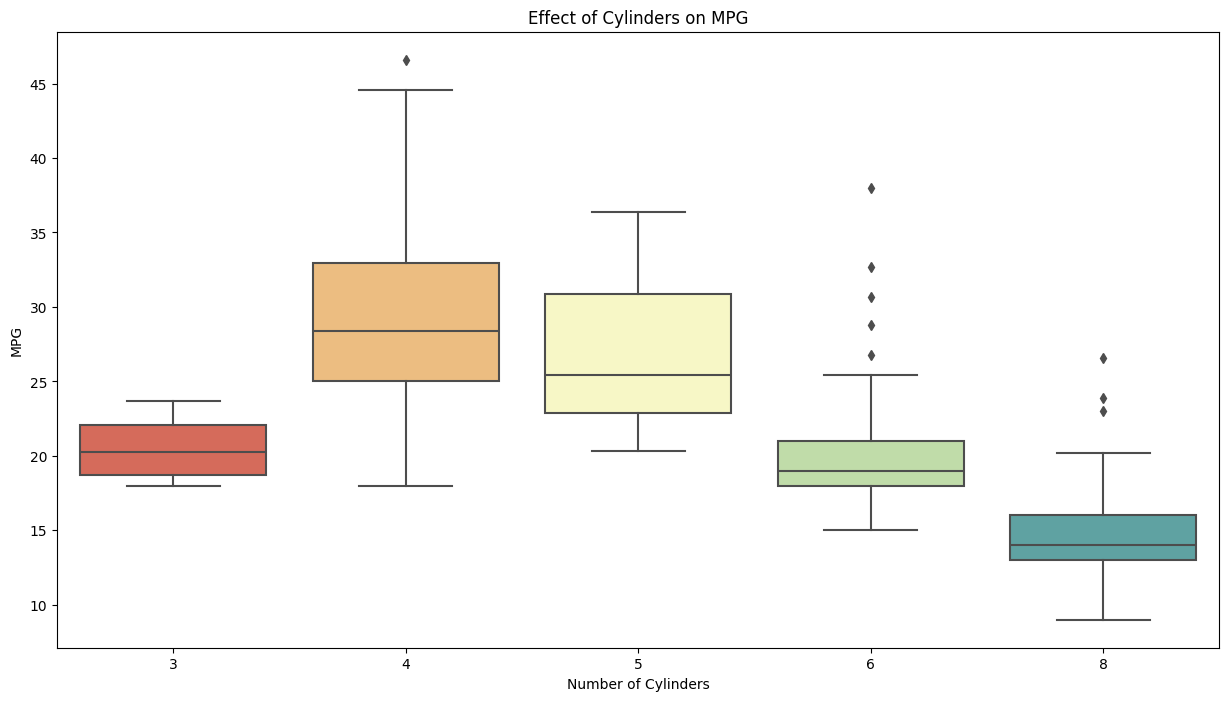

In [56]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="cylinders", y="mpg", data=df, palette="Spectral")
plt.title('Effect of Cylinders on MPG')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.show()

In [57]:
# 4-cylinder vehicles have better mileage (higher mpg values)
# The mpg values decrease as the number of cylinders increases

*Does the number of model_year affect the mpg value?*

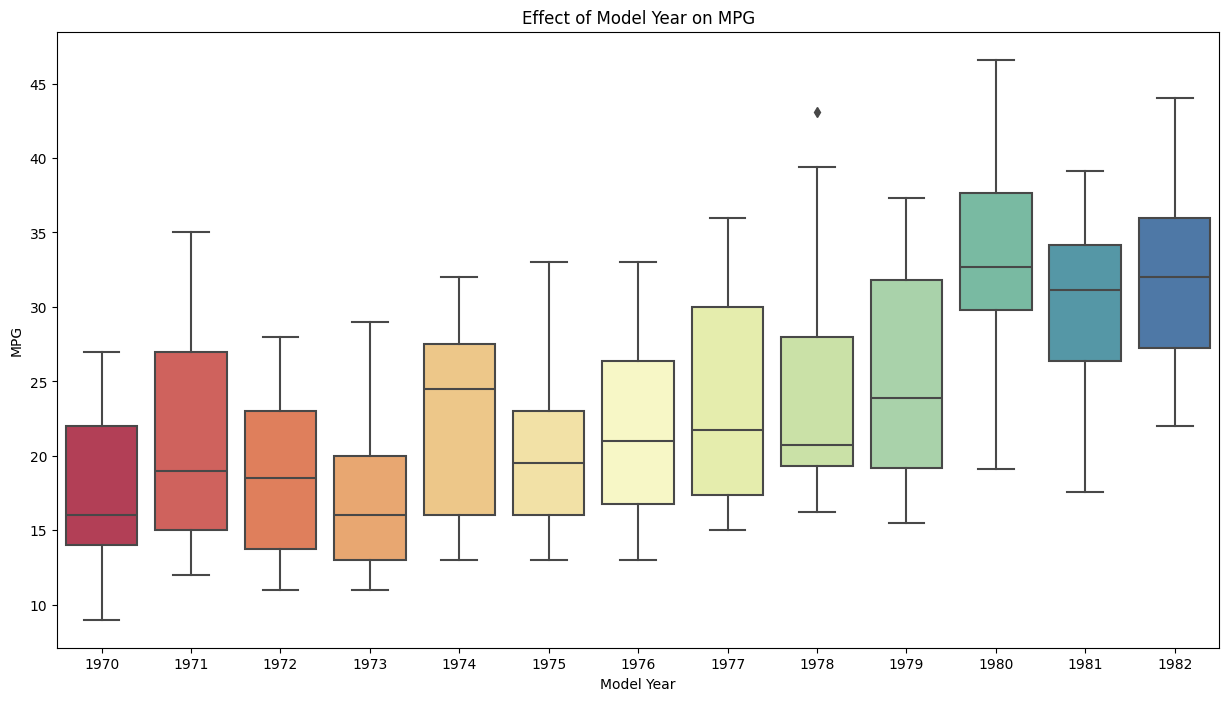

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="model_year", y="mpg", data=df, palette="Spectral")
plt.title('Effect of Model Year on MPG')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()

In [60]:
#As the years increase, the mpg values increase with the newer models

**Multivariate Analysis**

*Horsepower vs. MPG colored by Origin*

<Figure size 1500x900 with 0 Axes>

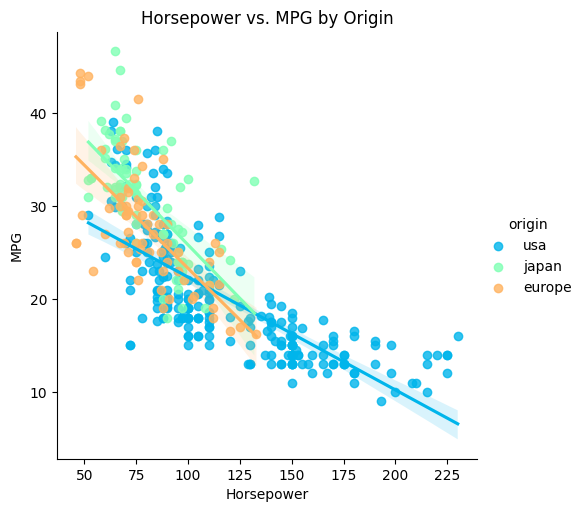

In [63]:
plt.figure(figsize=(15, 9))
sns.lmplot(x="horsepower", y="mpg", hue="origin", data=df, palette="rainbow")
plt.title('Horsepower vs. MPG by Origin')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

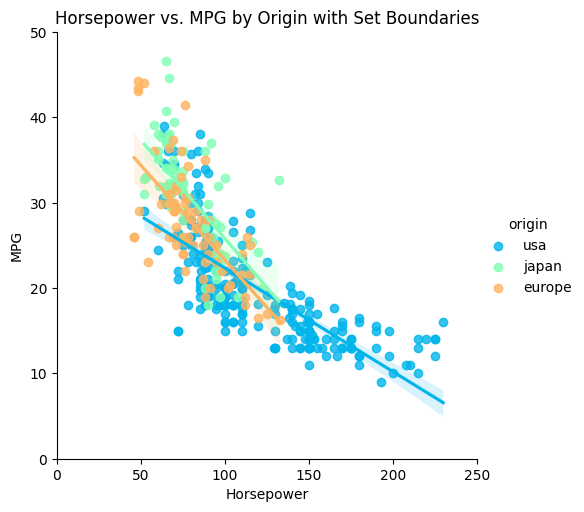

In [64]:
#Let's define the boundaries of the axes
graph = sns.lmplot(x="horsepower", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 250), ylim=(0, 50))
plt.title('Horsepower vs. MPG by Origin with Set Boundaries')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [65]:
# Cars produced in all countries have mpg values decrease with increase in horsepower
# The softest reduction occurs in vehicles produced in the USA

*Acceleration vs. MPG colored by Origin*

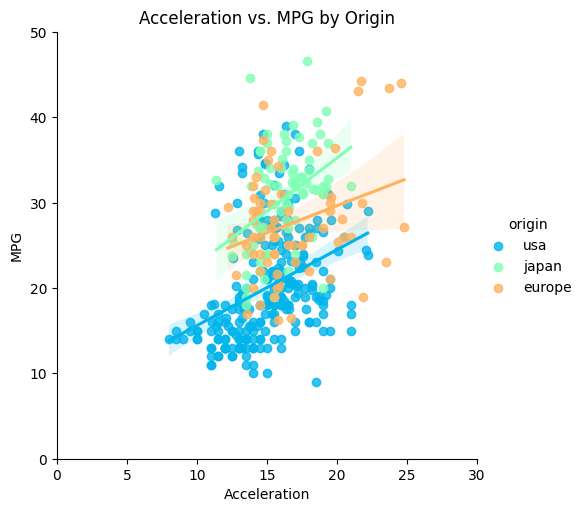

In [67]:
graph = sns.lmplot(x="acceleration", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 30), ylim=(0, 50))
plt.title('Acceleration vs. MPG by Origin')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

In [68]:
#The mpg value increases as the acceleration value increases
# This ratio is lowest in european cars

*Weight vs. MPG colored by Origin*

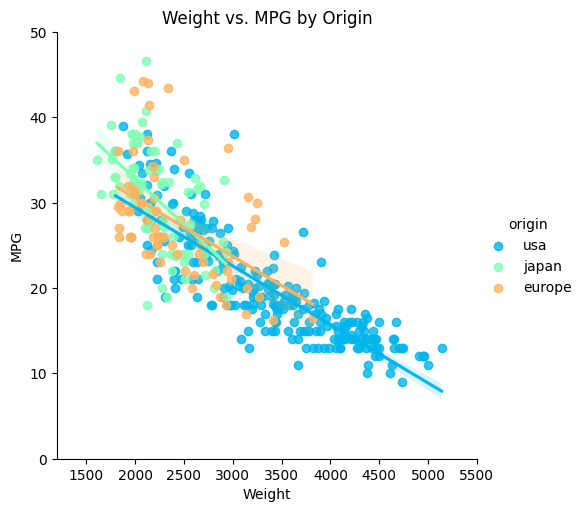

In [70]:
graph = sns.lmplot(x="weight", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(1200, 5500), ylim=(0, 50))
plt.title('Weight vs. MPG by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [71]:
#As the weight increases the mpg value decreases

*Displacement vs. MPG colored by Origin*

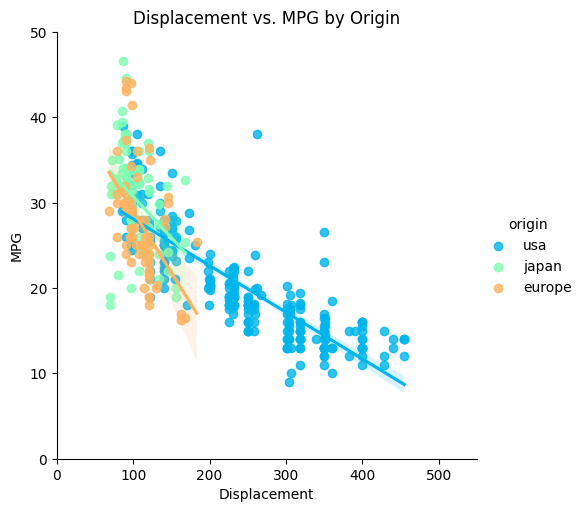

In [73]:
graph = sns.lmplot(x="displacement", y="mpg", hue="origin", data=df, palette="rainbow")
graph.set(xlim=(0, 550), ylim=(0, 50))
plt.title('Displacement vs. MPG by Origin')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

In [74]:
#MPG value decreases as the displacement increases
#Note the max engine volume values for each country

**Heatmap of Correlation Matrix**

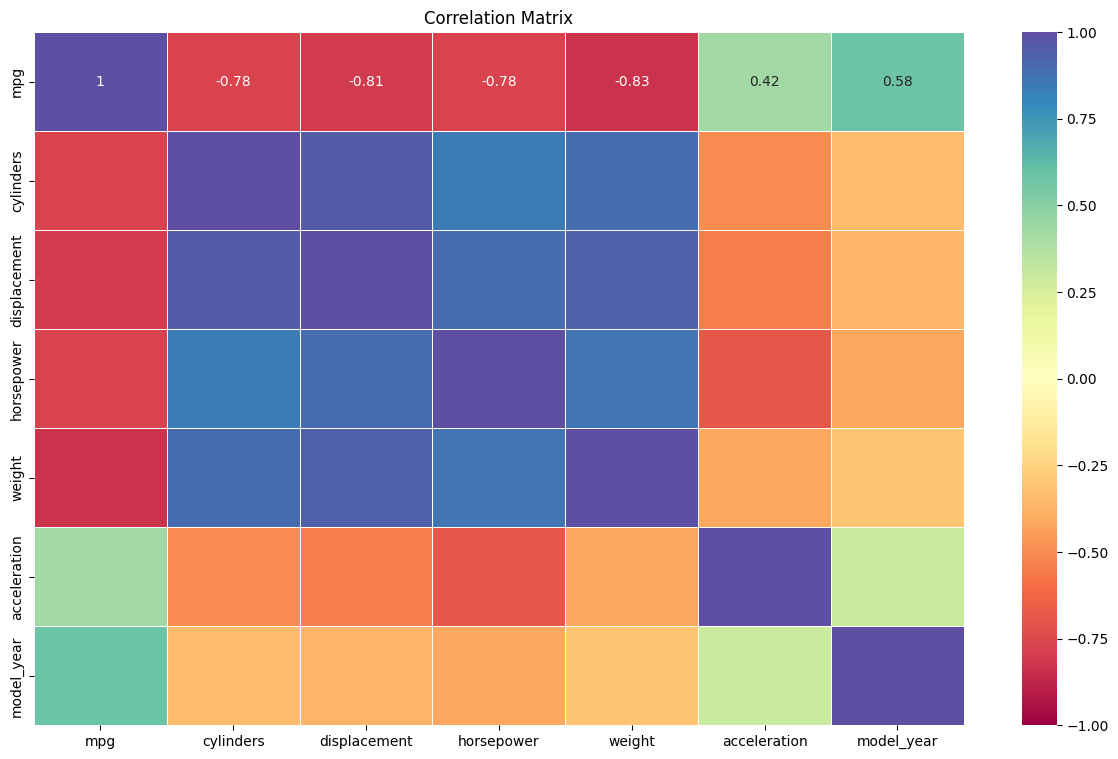

In [76]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 9))
sns.heatmap(df_numeric.corr(), annot=True, linewidth=0.5, cmap="Spectral", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [77]:
corr = df_numeric.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [78]:
#We can quickly see that all the other variables apart from the acceleration and model year are inversely proportional to the mpg variable

In [79]:
#displacement is highly correlated with other independent variables, removing it might help reduce multicollinearity, which can improve the model’s stability and interpretability.

In [80]:
# Dropping less relevant columns
columns_to_drop = ["displacement", "acceleration"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

*Let's do some* **Feature Engineering***

In [82]:
#Let's create an age variable from the model_year variable

In [83]:
#Let's import the modules and get the current date
from datetime import datetime
today = datetime.today()
today

datetime.datetime(2024, 8, 7, 21, 50, 54, 793974)

In [84]:
today = datetime.today()
current_year = today.year
df["age"] = current_year - df.model_year

In [85]:
# Drop model_year variable
columns_to_drop = ["model_year"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [86]:
#Let's look at the origin variable

In [87]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [88]:
# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   age           392 non-null    int64  
 5   origin_japan  392 non-null    bool   
 6   origin_usa    392 non-null    bool   
dtypes: bool(2), float64(2), int64(3)
memory usage: 19.1 KB


**Modelling**

In [91]:
#Let's define our independent and dependent variables respectively

In [92]:
X = df.drop("mpg", axis=1)
y = df["mpg"]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())

X_train head:
      cylinders  horsepower  weight  age  origin_japan  origin_usa
260          6       110.0    3620   46         False        True
184          4        92.0    2572   48         False        True
174          6        97.0    2984   49         False        True
64           8       150.0    4135   52         False        True
344          4        64.0    1875   43         False        True
y_train head:
 260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
Name: mpg, dtype: float64


In [96]:
# Confirm the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (313, 6)
X_test shape: (79, 6)
y_train shape: (313,)
y_test shape: (79,)


**Model Creation, Training, Prediction and Evaluation** 

In [265]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [267]:
# Create and train the Linear Regression model
mpg_model = LinearRegression()
mpg_model.fit(X_train, y_train)

LinearRegression()

In [269]:
# Display the intercept and coefficients
print("Intercept:", mpg_model.intercept_)
coef_param = pd.DataFrame(data=mpg_model.coef_, index=X.columns, columns=["Coefficient"])
print(coef_param)

Intercept: 79.80442103966979
              Coefficient
cylinders        0.203056
horsepower      -0.014143
weight          -0.005729
age             -0.779904
origin_japan     0.401853
origin_usa      -2.385047


In [ ]:
# When all the independent variables are 0, the y value is 79.80442103966979

In [115]:
# Positive Coefficient: Indicates that as the feature increases, the target variable (mpg) also increases.
# For example, cylinders has a coefficient of 0.203056, meaning that for each additional cylinder, mpg increases by approximately 0.203056 units, assuming all other features remain constant.

In [116]:
# Negative Coefficient: Indicates that as the feature increases, the target variable (mpg) decreases.
# For example, weight has a coefficient of -0.005729, meaning that for each additional unit of weight, mpg decreases by approximately 0.005729 units, assuming all other features remain constant.

* Making Predictions

In [272]:
# Make predictions on the test data
y_pred = mpg_model.predict(X_test)

* Evaluating Performance

In [275]:
# Calculate and display residuals
residuals = y_test - y_pred
compare = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Residuals": residuals
})

In [277]:
print(compare.sample(10))

     Actual  Predicted  Residuals
255    25.1  25.528786  -0.428786
175    29.0  30.314432  -1.314432
117    29.0  29.452644  -0.452644
74     13.0  11.908848   1.091152
134    16.0  17.279368  -1.279368
178    23.0  24.216366  -1.216366
389    22.0  28.056267  -6.056267
73     13.0  13.173142  -0.173142
248    36.1  33.982286   2.117714
335    35.0  30.734004   4.265996


In [279]:
# Define a function to evaluate model performance
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    print(f"Mean Absolute Error (MAE): {MAE}")
    print(f"Mean Squared Error (MSE): {MSE}")
    print(f"Root Mean Squared Error (RMSE): {RMSE}")
    print(f"R-squared Score: {SCORE}")

In [281]:
# Evaluate the model
evaluation_metrics(y_test, y_pred)

Mean Absolute Error (MAE): 2.5188281576150864
Mean Squared Error (MSE): 11.237861022823042
Root Mean Squared Error (RMSE): 3.3522919059686673
R-squared Score: 0.7798249880881911


In [125]:
# A small MAE = High accuracy, predictions are close to actual values while Large MAE = Lower accuracy, predictions are farther from actual values.
#r2_core of 1 means that the independent variables perfectly explain the variance in the dependent variable while r2_score of 0 means that the independent variables do not explain any of the variance.

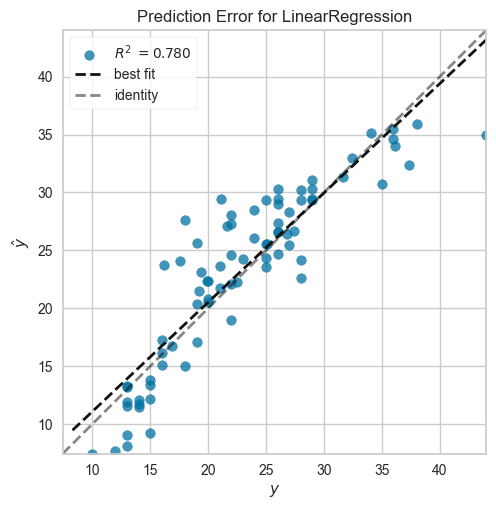

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [283]:
# Visualize model predictions using Yellowbrick
visualizer = PredictionError(mpg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

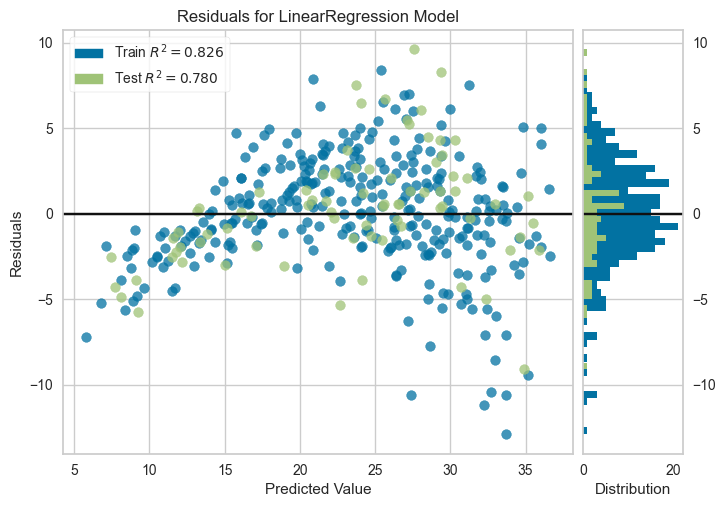

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [285]:
# Visualize residuals using Yellowbrick
visualizer = ResidualsPlot(mpg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
# An R2 score of 0.780 on the test dataset indicates that approximately 78% of the variance in the dependent variable (target) can be explained by our model.
# An R2 score of 0.826 on the training dataset indicates that about 82.6% of the variance in the target variable is explained by our model.

In [ ]:
# (0.826 - 0.780 = 0.046) suggests that there might be some overfitting.
# the difference is relatively small, which is a positive sign.